In [70]:
### Load dependencies, data, themes, configurations
rm(list = ls())
#require(c("tidyverse", "tidybayes", "broom", "lavaan", "cowplot", "readstata13", "foreign", "car", "modelr"))
### useful functinon to 0-1 recode
zero.one<-function(x){
  min.x<-min(x, na.rm=T)
  max.x<-max(x-min.x, na.rm=T)
  return((x-min.x)/max.x)
}

library(brms)
library(ggplot2)
library(modelr)
library(tidybayes)
library(dplyr)
library(cowplot)
library(haven)
library(forcats)
## Some helper functions, and configurations.
load("/Users/chrisweber/Desktop/Authoritarianism_V2/Authoritarianism_V2/clean_data/panel.auth.rda")  ### Just work from this data; everything should be here, recoded.
## models
load("/Users/chrisweber/Desktop/Authoritarianism_V2/Authoritarianism_V2/Chapters/Chapters/Chapter7/chapter7.rda")
dat2000 = tmp_data[[4]]
dat2012 = tmp_data[[5]]
dat2016 = tmp_data[[6]]

####
dim(dat2000)
dim(dat2012)
dim(dat2016)


ggtheme = theme(
        plot.title=element_text(face="bold",hjust=0,vjust=0,colour="#3C3C3C",size=20),
        axis.text.x=element_text(size=16,colour="#535353",face="bold"),
        axis.text.y=element_text(size=16,colour="#535353",face="bold"),
        axis.title = element_text(size=16,colour="#535353",face="bold"),
        axis.title.y=element_text(size=16,colour="#535353",face="bold",vjust=1.5),
        axis.ticks=element_blank(),
        strip.text.x = element_text(size = 16),
        panel.grid.major=element_line(colour="#D0D0D0",size=.25),
        panel.background=element_rect(fill="white"),
        legend.text=element_text(size=14),
        legend.title=element_text(size=16)) 

[1] 449  15

[1] 3860   15

[1] 1277   15

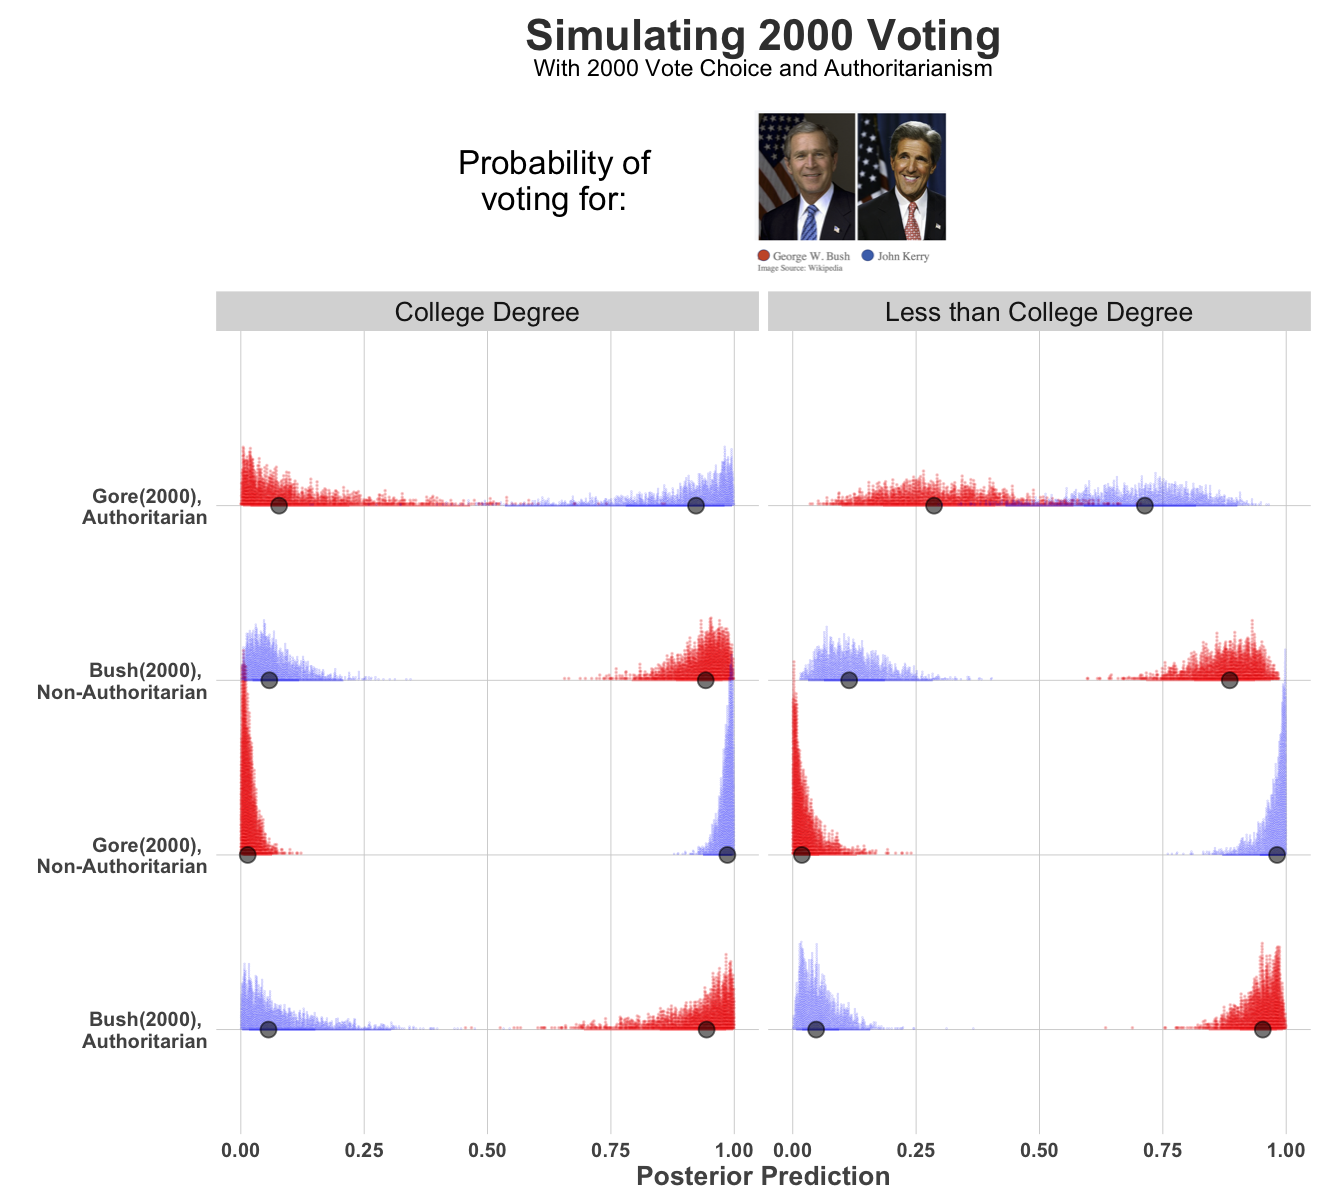

In [72]:
plot = zap_labels(dat2000) %>%  mutate(vote1 = as.vector(vote1)) %>%
            data_grid(sex.2000 = mean(sex.2000), age.2000 = mean(age.2000), 
                       college.2000 =c(0,1), income.2000 = mean(income.2000), 
                       authoritarianism = seq_range(authoritarianism, n = 2),
                       vote1 = seq_range(vote1, n = 2)) %>% 
                       mutate(authoritarianism_2 = authoritarianism*authoritarianism) %>%
                       add_linpred_draws(dat[[7]]) %>% 
                       mutate(Vote_Republican = plogis(.linpred)) %>% 
                       mutate(Authoritarianism = recode(authoritarianism, `0` = "Non-Authoritarians", `1` = "Authoritarianism")) %>%
                       mutate(Voter = ifelse(vote1 == 1 & authoritarianism == 1, paste("Bush(2000),", "\nAuthoritarian"),
                                           ifelse(vote1 == 0 & authoritarianism ==0, paste("Gore(2000),", "\nNon-Authoritarian"), 
                                                ifelse(vote1 == 1 & authoritarianism ==0, paste("Bush(2000),", "\nNon-Authoritarian"), 
                                                        paste("Gore(2000),", "\nAuthoritarian")))))  %>% 
                       mutate(Vote_Democrat = 1 - Vote_Republican) %>%
                       mutate(Voter =   factor(Voter, levels=c(paste("Gore(2000),", "\nAuthoritarian"),
                                        paste("Bush(2000),", "\nNon-Authoritarian"), 
                                        paste("Gore(2000),", "\nNon-Authoritarian"), 
                                        paste("Bush(2000),", "\nAuthoritarian")))) %>% 
                        mutate(Voter = fct_rev(Voter)) %>% group_by(Voter, Authoritarianism) %>% 
                        mutate(college = recode(college.2000, `0` = "Less than College Degree", `1` = "College Degree")) %>% 
                     ggplot() + facet_wrap(~college) +
                          stat_dotsinterval(aes(y = Vote_Republican, x = Voter), 
                                            slab_color = "red", scale = 1.2, interval_size = 1, 
                                            point_size =4 , interval_color = "red",
                                            dotsize = 9, side = "top", alpha = 0.32,  
                                            layout = "swarm", point_color = "black", 
                                            slab_fill = "darkred", slab_alpha =.20) +
                    stat_dotsinterval( aes(y = Vote_Democrat, x = Voter), 
                                            point_color = "black", point_size = 4,
                                            slab_color = "blue", scale = 1.2, alpha = 0.32,
                                            interval_size = 1, interval_color = "blue",
                                            dotsize = 3, side = "top", slab_alpha = 0.2, 
                                            layout = "swarm", slab_fill = "darkblue") +
                    labs (title = "Simulating the 2004 Election", subtitle = "With 2000 Vote Choice and Authoritarianism") + 
                
                    coord_flip() +
                    ggtheme + scale_fill_manual(aes(fill = Voter_Type, group = Voter_Type),
                    name="Predicted 2004\nPresidential Vote", values=c("blue", "red"),  position = "top") +

         labs (title = "Simulating 2000 Voting", 
                          subtitle = "With 2000 Vote Choice and Authoritarianism\n\n\n\n\n\n\n\n") + 
            scale_y_continuous("Posterior Prediction", limits=c(0,1))+
            scale_x_discrete("") + 
            ggtheme + 
                # overrides
                    theme(legend.position="top",
                    legend.text = element_text(size=12),
                    plot.title = element_text(size = 26, hjust = 0.5),
                    plot.subtitle = element_text(size = 14, hjust = 0.5),
                        axis.text.x=element_text(size=12,colour="#535353",face="bold"),
                        axis.text.y=element_text(size=12,colour="#535353",face="bold"),
                        axis.title.y=element_text(size=12,colour="#535353",face="bold",vjust=1.5),
                        axis.ticks=element_blank(),
                        legend.title = element_text(size=12,colour="#535353",face="bold"),
                        panel.grid.major=element_line(colour="#D0D0D0",size=.25)      
                    )

   options(repr.plot.width=11, repr.plot.height=10)
          
 ggdraw() +
   draw_plot(plot)+
   draw_image("/Users/chrisweber/Desktop/Authoritarianism_V2/Authoritarianism_V2/figs/pres/bushkerry.png",
               x = 0.52, y = 0.77, width =0.25, height =0.14) +
   draw_label("Probability of\nvoting for:", color = "black", x = 0.42, y=0.85, size = 20)


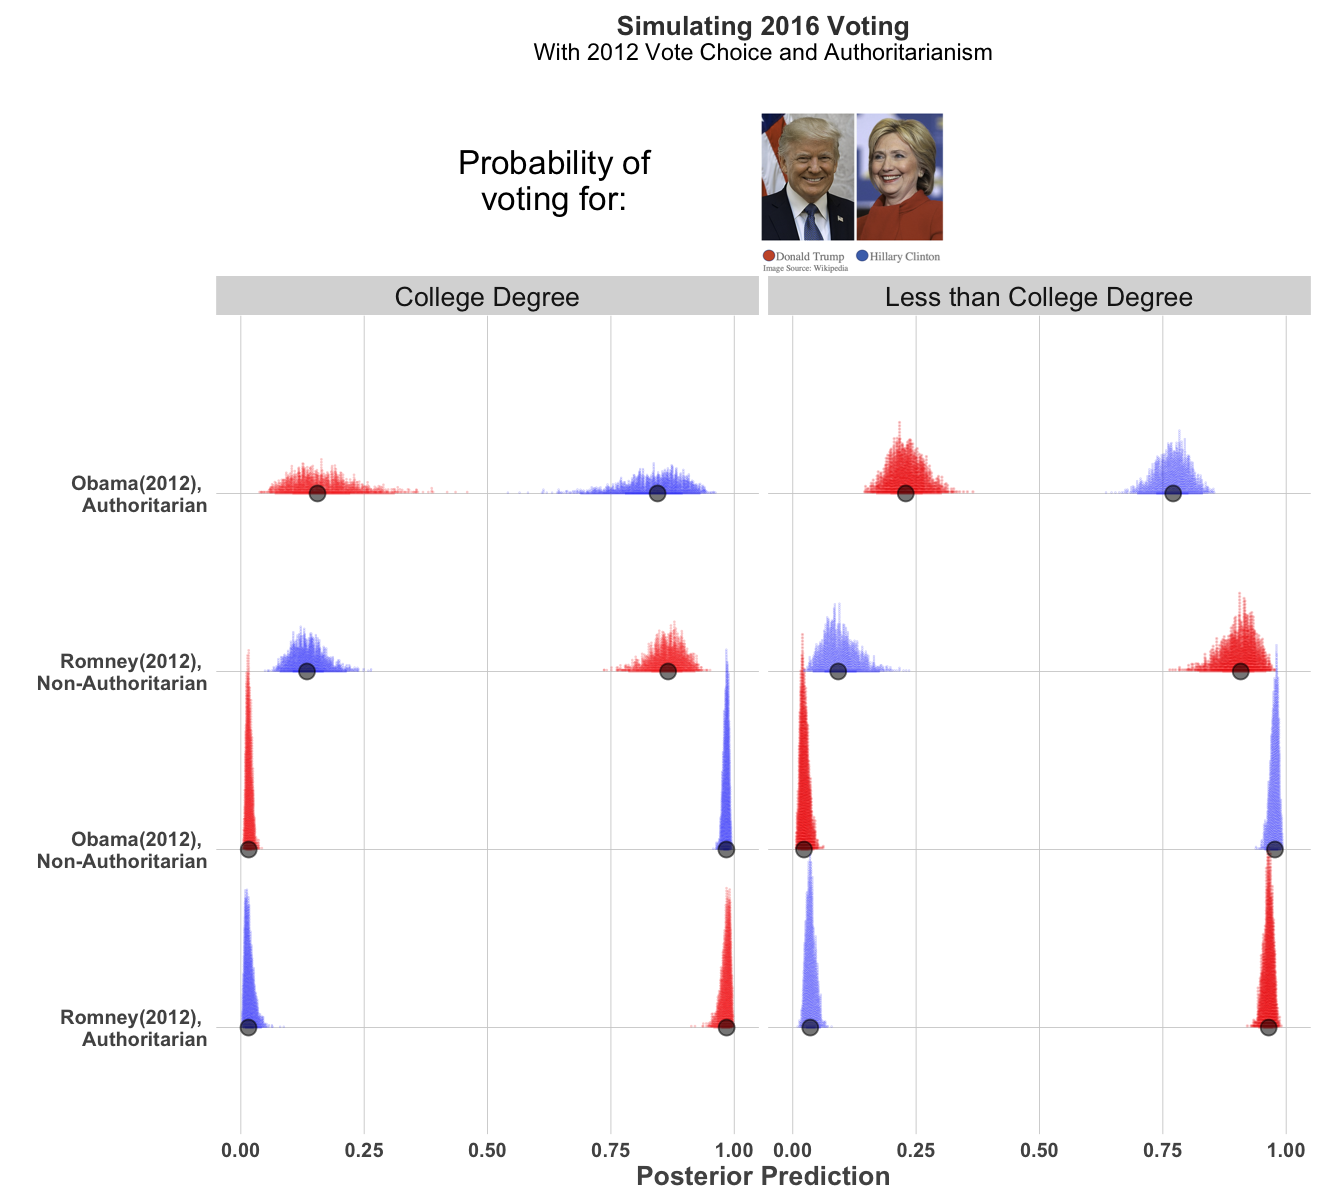

In [66]:
plot =  zap_labels(dat2012) %>% data_grid(sex.2012 = mean(sex.2012), age.2012 = mean(age.2012), 
                       college.2012= c(0,1), income.2012 = mean(income.2012), 
                       authoritarianism = seq_range(authoritarianism, n = 2),
                       vote1 = seq_range(vote1, n = 2)) %>% 
                       mutate(authoritarianism_2 = authoritarianism*authoritarianism) %>%
                       add_linpred_draws(dat[[8]]) %>% 
                       mutate(Vote_Republican = plogis(.linpred)) %>% 
                       mutate(Authoritarianism = recode(authoritarianism, `0` = "Non-Authoritarians", `1` = "Authoritarianism")) %>%
                       mutate(Voter = ifelse(vote1 == 1 & authoritarianism == 1, paste("Romney(2012),", "\nAuthoritarian"),
                                           ifelse(vote1 == 0 & authoritarianism ==0, paste("Obama(2012),", "\nNon-Authoritarian"), 
                                                ifelse(vote1 == 1 & authoritarianism ==0, paste("Romney(2012),", "\nNon-Authoritarian"), 
                                                        paste("Obama(2012),", "\nAuthoritarian")))))  %>% 
                       mutate(Vote_Democrat = 1 - Vote_Republican) %>%
                       mutate(Voter =   factor(Voter, levels=c(paste("Obama(2012),", "\nAuthoritarian"),
                                        paste("Romney(2012),", "\nNon-Authoritarian"), 
                                        paste("Obama(2012),", "\nNon-Authoritarian"), 
                                        paste("Romney(2012),", "\nAuthoritarian")))) %>% 
                        mutate(Voter = fct_rev(Voter)) %>% group_by(Voter, Authoritarianism) %>% 
                        mutate(college = recode(college.2012, `0` = "Less than College Degree", `1` = "College Degree")) %>% 
                     ggplot() + facet_wrap(~college) +
                          stat_dotsinterval(aes(y = Vote_Republican, x = Voter), 
                                            slab_color = "red", scale = 1.2, interval_size = 1, 
                                            point_size =4 , interval_color = "red",
                                            dotsize = 9, side = "top", alpha = 0.32,  
                                            layout = "swarm", point_color = "black", 
                                            slab_fill = "darkred", slab_alpha =.20) +
                    stat_dotsinterval( aes(y = Vote_Democrat, x = Voter), 
                                            point_color = "black", point_size = 4,
                                            slab_color = "blue", scale = 1.2, alpha = 0.32,
                                            interval_size = 1, interval_color = "blue",
                                            dotsize = 3, side = "top", slab_alpha = 0.2, 
                                            layout = "swarm", slab_fill = "darkblue") +
                    labs (title = "Simulating the 2016 Election", subtitle = "With 2012 Vote Choice and Authoritarianism") + 
                    coord_flip() +
                    ggtheme + scale_fill_manual(aes(fill = Voter_Type, group = Voter_Type),
                    name="Predicted 2016\nPresidential Vote", values=c("blue", "red"),  position = "top") +

         labs (title = "Simulating 2016 Voting", 
                          subtitle = "With 2012 Vote Choice and Authoritarianism\n\n\n\n\n\n\n\n") + 
            scale_y_continuous("Posterior Prediction", limits=c(0,1))+
            scale_x_discrete("") + 
            ggtheme + 
                # overrides
                    theme(legend.position="top",
                    legend.text = element_text(size=12),
                    plot.title = element_text(size = 16, hjust = 0.5),
                    plot.subtitle = element_text(size = 14, hjust = 0.5),
                        axis.text.x=element_text(size=12,colour="#535353",face="bold"),
                        axis.text.y=element_text(size=12,colour="#535353",face="bold"),
                        axis.title.y=element_text(size=12,colour="#535353",face="bold",vjust=1.5),
                        axis.ticks=element_blank(),
                        legend.title = element_text(size=12,colour="#535353",face="bold"),
                        panel.grid.major=element_line(colour="#D0D0D0",size=.25)      
                    )
    ggdraw() +
   draw_plot(plot)+
   draw_image("/Users/chrisweber/Desktop/Authoritarianism_V2/Authoritarianism_V2/figs/pres/trumpclinton.png",
               x = 0.52, y = 0.77, width =0.25, height =0.14) +
   draw_label("Probability of\nvoting for:", color = "black", x = 0.42, y=0.85, size = 20)


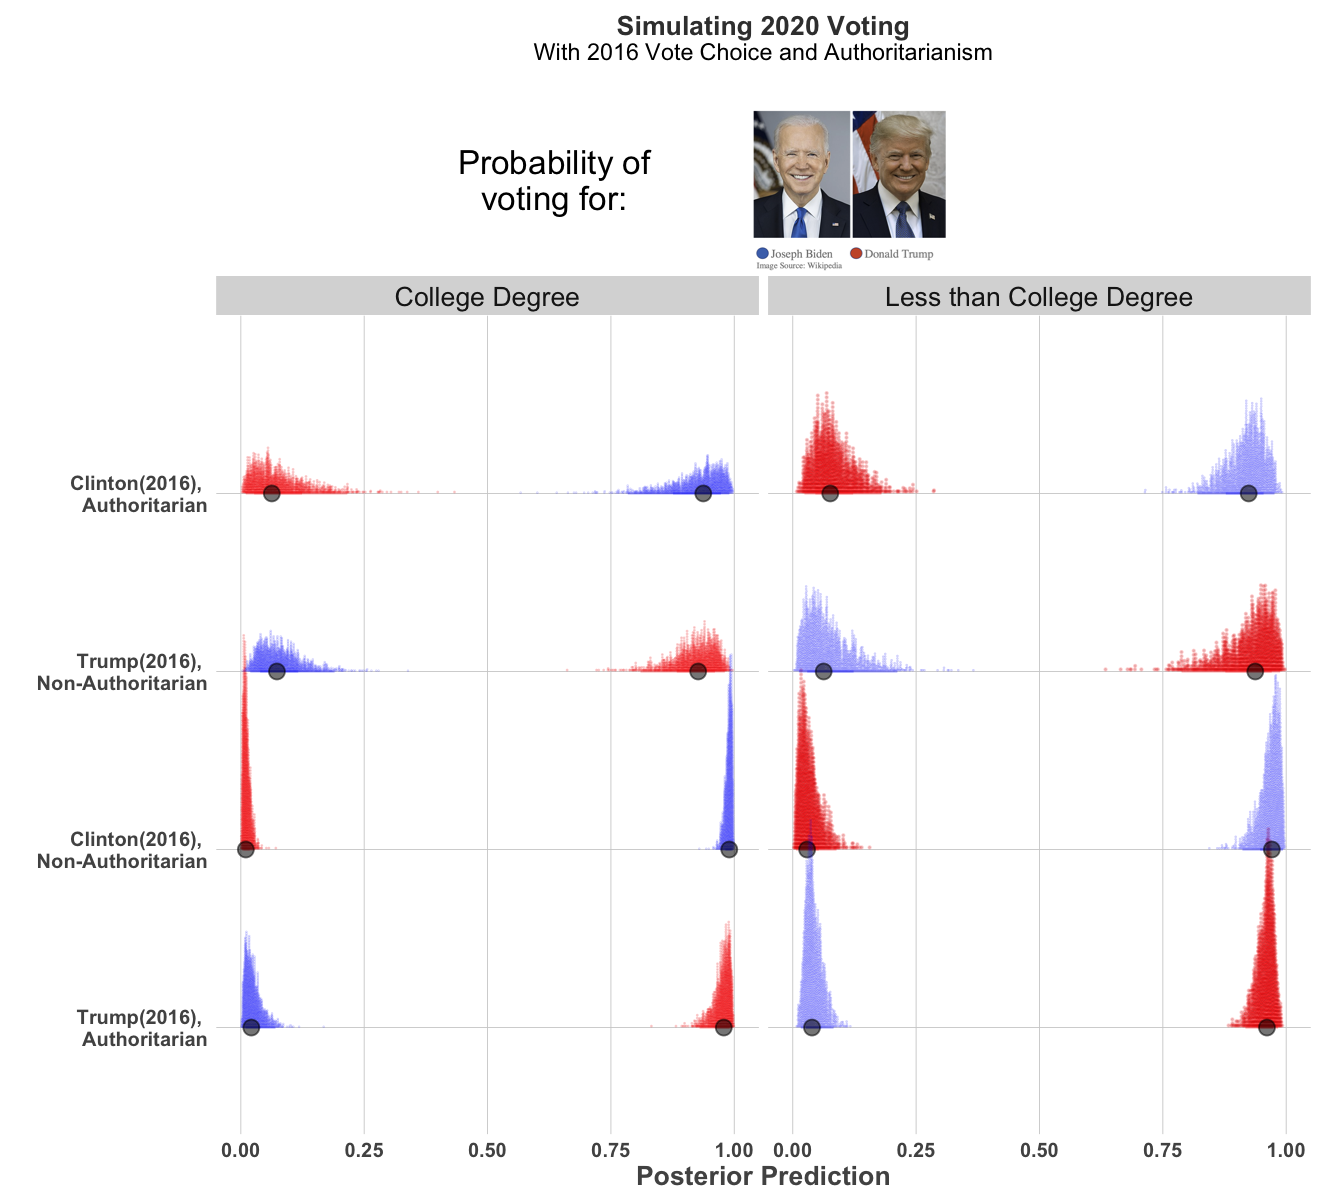

In [67]:

 plot = dat2016 %>% data_grid(female.2016 = mean(female.2016), age.2016 = mean(age.2016), 
                       college.2016= c(0,1), income.2016 = mean(income.2016), 
                       authoritarianism = seq_range(authoritarianism, n = 2),
                       vote1 = seq_range(vote1, n = 2)) %>% 
                       mutate(authoritarianism_2 = authoritarianism*authoritarianism) %>%
                       add_linpred_draws(dat[[9]]) %>% 
                       mutate(Vote_Republican = plogis(.linpred)) %>% 
                       mutate(Authoritarianism = recode(authoritarianism, `0` = "Non-Authoritarians", `1` = "Authoritarianism")) %>%
                       mutate(Voter = ifelse(vote1 == 1 & authoritarianism == 1, paste("Trump(2016),", "\nAuthoritarian"),
                                           ifelse(vote1 == 0 & authoritarianism ==0, paste("Clinton(2016),", "\nNon-Authoritarian"), 
                                                ifelse(vote1 == 1 & authoritarianism ==0, paste("Trump(2016),", "\nNon-Authoritarian"), 
                                                        paste("Clinton(2016),", "\nAuthoritarian")))))  %>% 
                       mutate(Vote_Democrat = 1 - Vote_Republican) %>%
                       mutate(Voter =   factor(Voter, levels=c(paste("Clinton(2016),", "\nAuthoritarian"),
                                        paste("Trump(2016),", "\nNon-Authoritarian"), 
                                        paste("Clinton(2016),", "\nNon-Authoritarian"), 
                                        paste("Trump(2016),", "\nAuthoritarian")))) %>% 
                        mutate(Voter = fct_rev(Voter)) %>% 
                        mutate(college = recode(college.2016, `0` = "Less than College Degree", `1` = "College Degree")) %>% 
                     ggplot() + facet_wrap(~college) +
                          stat_dotsinterval(aes(y = Vote_Republican, x = Voter), 
                                            slab_color = "red", scale = 1.2, interval_size = 1, 
                                            point_size =4 , interval_color = "red",
                                            dotsize = 9, side = "top", alpha = 0.32,  
                                            layout = "swarm", point_color = "black", 
                                            slab_fill = "darkred", slab_alpha =.20) +
                    stat_dotsinterval( aes(y = Vote_Democrat, x = Voter), 
                                            point_color = "black", point_size = 4,
                                            slab_color = "blue", scale = 1.2, alpha = 0.32,
                                            interval_size = 1, interval_color = "blue",
                                            dotsize = 3, side = "top", slab_alpha = 0.2, 
                                            layout = "swarm", slab_fill = "darkblue") +
                    labs (title = "Simulating the 2020 Election", subtitle = "With 2016 Vote Choice and Authoritarianism") + 
                    coord_flip() +
                    ggtheme + scale_fill_manual(aes(fill = Voter_Type, group = Voter_Type),
                    name="Predicted 2020\nPresidential Vote", values=c("blue", "red"),  position = "top") +

         labs (title = "Simulating 2020 Voting", 
                          subtitle = "With 2016 Vote Choice and Authoritarianism\n\n\n\n\n\n\n\n") + 
            scale_y_continuous("Posterior Prediction", limits=c(0,1))+
            scale_x_discrete("") + 
            ggtheme + 
                # overrides
                    theme(legend.position="top",
                    legend.text = element_text(size=12),
                    plot.title = element_text(size = 16, hjust = 0.5),
                    plot.subtitle = element_text(size = 14, hjust = 0.5),
                        axis.text.x=element_text(size=12,colour="#535353",face="bold"),
                        axis.text.y=element_text(size=12,colour="#535353",face="bold"),
                        axis.title.y=element_text(size=12,colour="#535353",face="bold",vjust=1.5),
                        axis.ticks=element_blank(),
                        legend.title = element_text(size=12,colour="#535353",face="bold"),
                        panel.grid.major=element_line(colour="#D0D0D0",size=.25)      
                    )
ggdraw() +
   draw_plot(plot)+
   draw_image("/Users/chrisweber/Desktop/Authoritarianism_V2/Authoritarianism_V2/figs/pres/trumpbiden.png",
               x = 0.52, y = 0.77, width =0.25, height =0.14) +
   draw_label("Probability of\nvoting for:", color = "black", x = 0.42, y=0.85, size = 20)
             